## 17/09/23

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
%matplotlib inline

In [2]:
df = pd.read_csv("../../dataset/50_Startups.csv")
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.62,45902.26,0.00,39936.37,73051.08,101602.80,165349.20
Administration,50.0,121344.64,28017.80,51283.14,103730.88,122699.80,144842.18,182645.56
Marketing Spend,50.0,211025.10,122290.31,0.00,129300.13,212716.24,299469.08,471784.10
Profit,50.0,112012.64,40306.18,14681.40,90138.90,107978.19,139765.98,192261.83


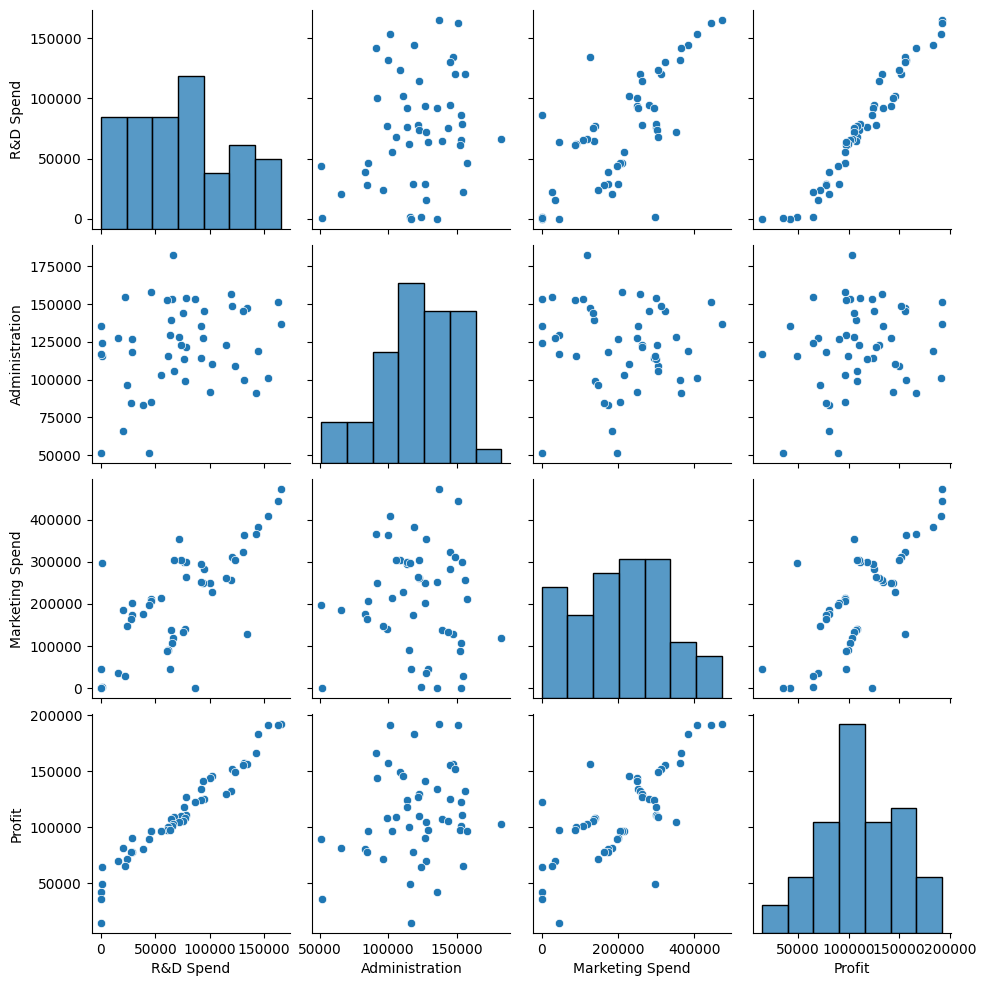

In [5]:
sns.pairplot(df)

In [6]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [7]:
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['State'])
df_copy = df.copy()
df['State'] = encoded

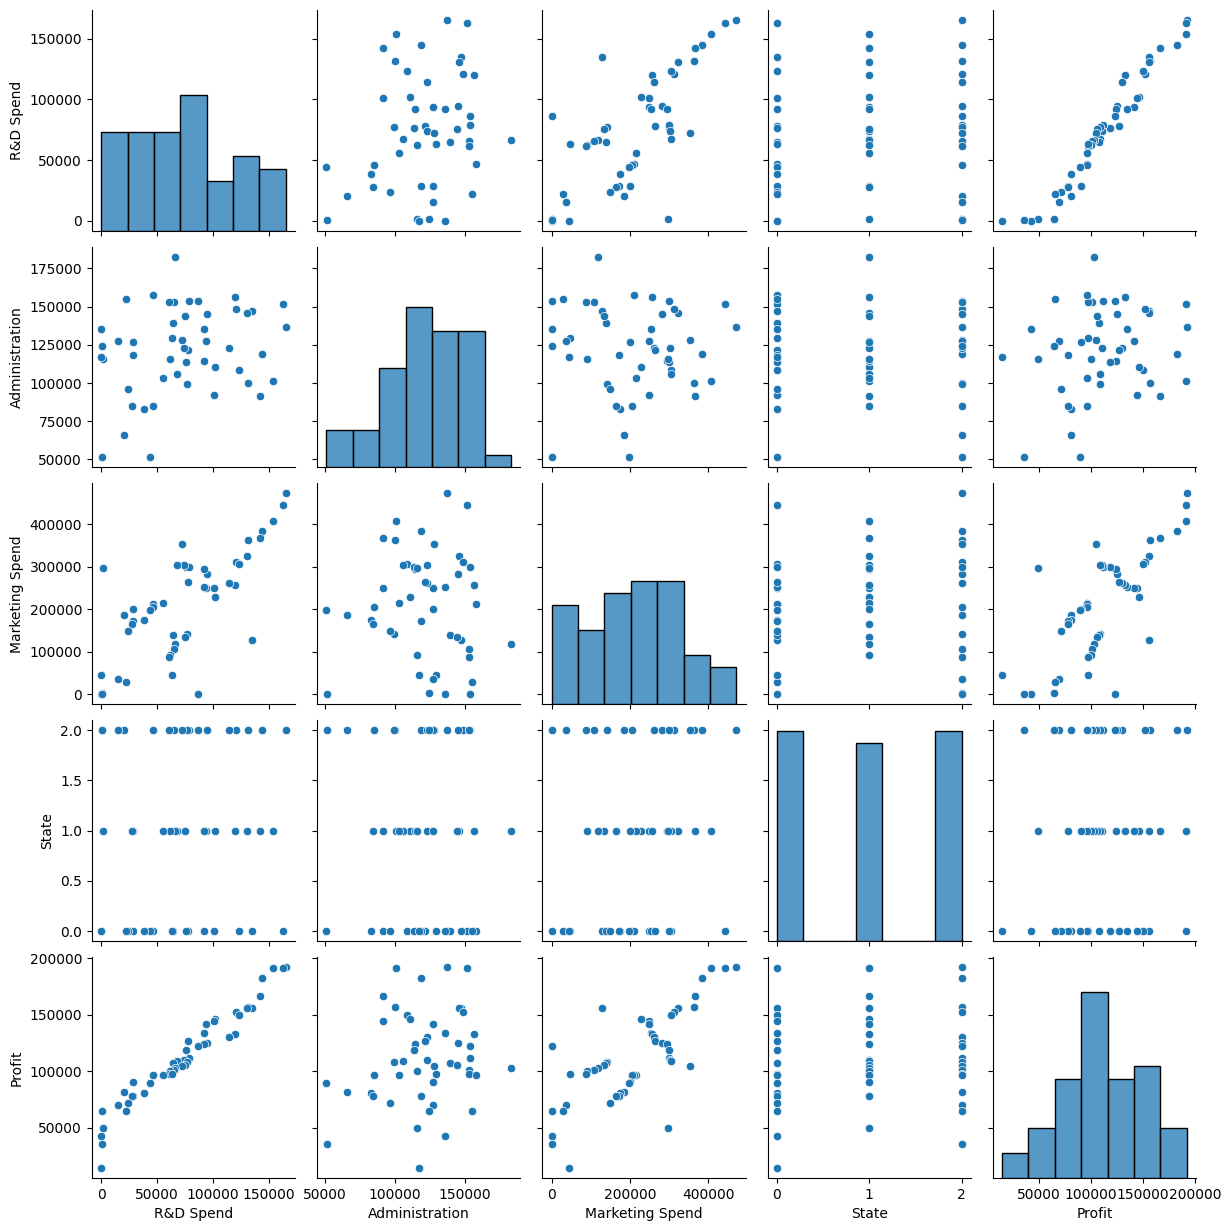

In [8]:
sns.pairplot(df)

In [15]:
X = df.drop(columns="Profit")

In [17]:
y = df['Profit']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [65]:
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X=X_train,y=Y_train)
knn

KNeighborsRegressor(n_neighbors=12)

In [66]:
y_pred = knn.predict(X_test)
y_pred[:5]

array([120543.82333333,  99115.31166667,  82181.9       ,  82181.9       ,
       130386.37833333])

In [67]:
print("Mean squared Error : ",mean_squared_error(Y_test,y_pred))
print("Mean absolute Error : ",mean_absolute_error(Y_test,y_pred))
print("Mean absolute percentage Error : ",(mean_absolute_percentage_error(Y_test,y_pred)*100),"%")

Mean squared Error :  433671835.88557947
Mean absolute Error :  17992.518269230764
Mean absolute percentage Error :  22.733824797213313 %


In [68]:
error = []
for i in range(1,35):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train,Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
error[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

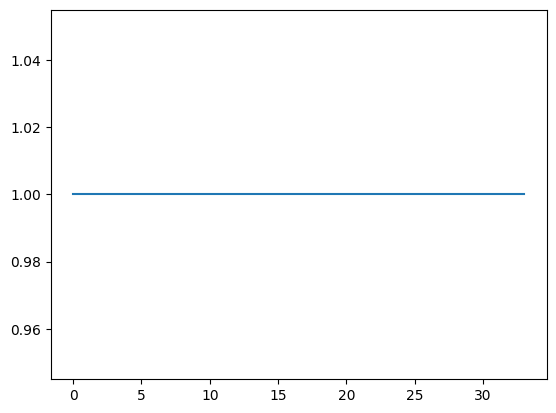

In [69]:
plt.plot(error)